In [18]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Principal Component Analysis
from sklearn.decomposition import PCA

In [19]:
def load_data(path):
    """Given the path of the directory containing the data, 
    the respective mat_file and M_curves data is loaded"""
    mat_file = "echo_params.txt"
    M_file_r = "echos_r" # real part of echos
    M_file_i = "echos_i" # imaginary part of echos

    mat_info = np.loadtxt(os.path.join(path,mat_file));

    # M(t) curve for each simulation:
    M_r = np.loadtxt(os.path.join(path,M_file_r));
    M_i = np.loadtxt(os.path.join(path,M_file_i));
    M = M_r + 1j*M_i;
    print("Finished loading data into numpy array")
    return M

def load_params(path):
    """Given the directory path loads the input parameter files for the simualtions"""
    params = np.loadtxt(os.path.join(path,"echo_params.txt"))
    cols = 'αx αy αz ξ p Γ3 stencil_type s p d pulse90 pulse180'.split()
    df = pd.DataFrame(params,columns=cols)
    print("Finsihed laoding parameters file")
    return df

In [20]:
path = '/content/drive/MyDrive/GSOC-NMR-project/Work/Data/2021-06-10_oscar_spinechosim_cuda/'

In [21]:
M = load_data(path)
data = pd.DataFrame(abs(M))
df_params = load_params(path).iloc[:,:7]

Finished loading data into numpy array
Finsihed laoding parameters file


In [22]:
df_params

,αx,αy,αz,ξ,p,Γ3,stencil_type
0,0.008625,0.007269,0.000254,0.000000,3.619798,0.007193,1.0
1,0.014533,0.005457,0.011385,0.000000,3.896568,0.000671,1.0
2,0.001180,0.008297,0.011342,0.000000,3.372088,0.000225,1.0
3,0.004745,0.000208,0.012479,0.000000,2.804681,0.000230,1.0
4,0.008073,0.014303,0.002546,0.000000,3.699985,0.000352,1.0
...,...,...,...,...,...,...,...
9995,0.002536,0.000564,0.007006,0.000000,3.028617,0.000175,1.0
9996,0.010087,0.011334,0.014100,1.166963,2.000000,0.002271,0.0
9997,0.014015,0.004026,0.009110,0.000000,3.638607,0.002984,1.0
9998,0.012439,0.000120,0.007931,0.000000,3.577928,0.004033,1.0


# Unsupervised Learning
**Goal** : 
- To discover interesting things about the
measurements: 
    - Is there an informative way to visualize the
data? 
    - Can we discover subgroups among the variables or
among the observations?

- We discuss two methods:
    1. **Principal Components Analysis**, a tool used for data
visualization or data pre-processing. It is also a linear feature extraction technique
    2. **Clustering**, a broad class of methods for discovering
unknown subgroups in data.

In [23]:
norm_data = data.values
norm_data = StandardScaler().fit_transform(norm_data) # normalizing the features

In [24]:
np.mean(norm_data), np.std(norm_data)

(-0.0010615711252632359, 0.9999994365332147)

In [25]:
# convert the normalized features into a tabular format
feat_cols = ['feature'+str(i) for i in range(norm_data.shape[1])]
normalised_data = pd.DataFrame(norm_data,columns=feat_cols)
normalised_data.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,...,feature902,feature903,feature904,feature905,feature906,feature907,feature908,feature909,feature910,feature911,feature912,feature913,feature914,feature915,feature916,feature917,feature918,feature919,feature920,feature921,feature922,feature923,feature924,feature925,feature926,feature927,feature928,feature929,feature930,feature931,feature932,feature933,feature934,feature935,feature936,feature937,feature938,feature939,feature940,feature941
9995,-1.0,0.556483,0.562747,0.551031,0.529527,0.496157,0.448716,0.388681,0.317020,0.238287,0.158183,0.079542,0.005573,-0.062619,-0.127240,-0.189311,-0.250386,-0.312006,-0.373692,-0.434606,-0.493207,-0.547169,-0.595664,-0.637852,-0.673711,-0.704705,-0.731895,-0.756414,-0.780013,-0.802847,-0.825125,-0.846835,-0.866988,-0.885104,-0.900827,-0.913541,-0.923671,-0.931481,-0.937381,-0.942328,...,0.090730,0.042605,0.030782,0.043905,0.071796,0.111175,0.159187,0.206442,0.234890,0.225776,0.177578,0.122071,0.123097,0.225356,0.410008,0.623921,0.813923,0.939710,0.976227,0.912929,0.757372,0.530588,0.261493,-0.014582,-0.262243,-0.445930,-0.531931,-0.516843,-0.437166,-0.320951,-0.175376,0.001953,0.212419,0.447791,0.694325,0.938100,1.168828,1.383085,1.577476,1.742839
9996,-1.0,-0.367073,-0.374588,-0.384671,-0.397233,-0.415475,-0.441156,-0.470808,-0.505028,-0.540176,-0.573426,-0.604486,-0.631145,-0.654093,-0.674618,-0.692245,-0.708821,-0.724063,-0.737779,-0.750617,-0.761272,-0.770061,-0.776983,-0.781836,-0.785351,-0.787594,-0.788655,-0.789271,-0.789124,-0.788508,-0.787569,-0.786040,-0.784220,-0.782253,-0.779903,-0.777592,-0.775183,-0.772654,-0.770137,-0.767390,...,-0.845904,-0.834989,-0.848381,-0.879363,-0.916583,-0.948423,-0.966986,-0.969167,-0.957877,-0.941431,-0.926015,-0.917537,-0.915069,-0.914936,-0.916944,-0.919833,-0.925999,-0.935297,-0.945518,-0.955097,-0.968794,-0.990019,-1.013307,-1.033661,-1.052242,-1.071817,-1.093230,-1.100950,-1.070500,-1.031211,-0.985307,-0.935452,-0.884972,-0.836107,-0.791467,-0.751327,-0.716301,-0.688418,-0.668162,-0.657389
9997,-1.0,-0.688153,-0.692290,-0.686538,-0.679945,-0.663402,-0.640712,-0.614181,-0.575538,-0.538850,-0.498920,-0.455357,-0.419780,-0.381346,-0.345049,-0.312952,-0.275425,-0.240526,-0.205099,-0.166130,-0.132613,-0.099114,-0.068444,-0.044711,-0.022276,-0.004256,0.010314,0.025392,0.038376,0.051526,0.065461,0.078392,0.090987,0.102520,0.111893,0.119263,0.124804,0.128296,0.130372,0.132146,...,-1.122587,-1.102547,-1.092254,-1.085162,-1.076328,-1.063813,-1.049710,-1.038832,-1.031910,-1.029900,-1.032304,-1.038235,-1.043841,-1.046459,-1.048631,-1.051658,-1.057924,-1.063647,-1.065640,-1.060963,-1.053746,-1.049448,-1.042562,-1.029644,-1.014848,-1.000596,-0.987088,-0.973164,-0.960290,-0.949599,-0.941888,-0.938100,-0.940812,-0.949001,-0.961810,-0.976057,-0.986813,-0.992700,-0.992233,-0.986527
9998,-1.0,-1.153539,-1.168125,-1.167348,-1.176084,-1.184470,-1.194323,-1.208490,-1.215170,-1.224332,-1.228942,-1.225227,-1.224633,-1.216615,-1.206639,-1.198360,-1.182232,-1.167430,-1.150286,-1.126699,-1.106487,-1.082996,-1.058711,-1.039491,-1.018214,-1.000014,-0.984400,-0.966269,-0.950616,-0.933818,-0.915007,-0.898012,-0.879550,-0.861786,-0.846653,-0.831611,-0.819244,-0.808856,-0.798579,-0.790029,...,-1.133534,-1.118256,-1.112838,-1.112248,-1.110801,-1.105730,-1.098791,-1.092496,-1.087196,-1.083451,-1.080534,-1.081253,-1.084734,-1.087798,-1.090931,-1.093258,-1.096468,-1.099717,-1.100726,-1.098481,-1.099232,-1.107599,-1.102740,-1.087780,-1.074324,-1.065646,-1.060787,-1.056937,-1.055565,-1.055901,-1.057761,-1.061520,-1.067785,-1.075860,-1.085461,-1.093877,-1.099314,-1.101834,-1.099742,-1.093946
9999,-1

In [27]:
pca_NMR = PCA(n_components=2)
principalComponents_NMR = pca_NMR.fit_transform(normalised_data)

In [28]:
pca_NMR.explained_variance_

array([385.68488296, 215.11352465])

In [29]:
principal_NMR = pd.DataFrame(data = principalComponents_NMR
             , columns = ['PC1', 'PC2'])

In [30]:
print('Explained variation per principal component: {}'.format(pca_NMR.explained_variance_ratio_))

Explained variation per principal component: [0.40982605 0.22857812]


<Figure size 432x288 with 0 Axes>

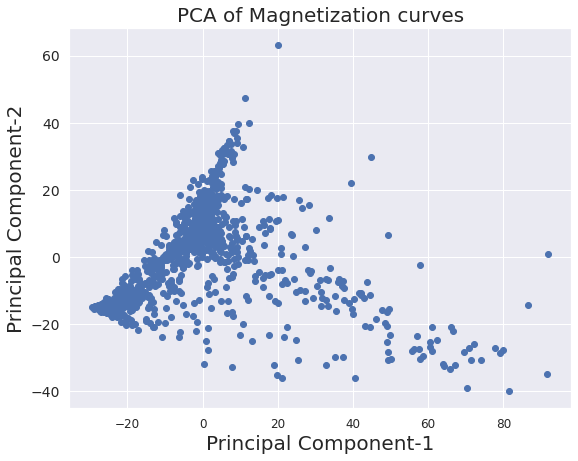

In [31]:
npoints = 10000
idx = range(0,npoints,10)

plt.figure()
plt.figure(figsize=(9,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component-1',fontsize=20)
plt.ylabel('Principal Component-2',fontsize=20)
plt.title("PCA of Magnetization curves",fontsize=20)


plt.scatter(principal_NMR.iloc[idx,0],principal_NMR.iloc[idx,1])
plt.show()

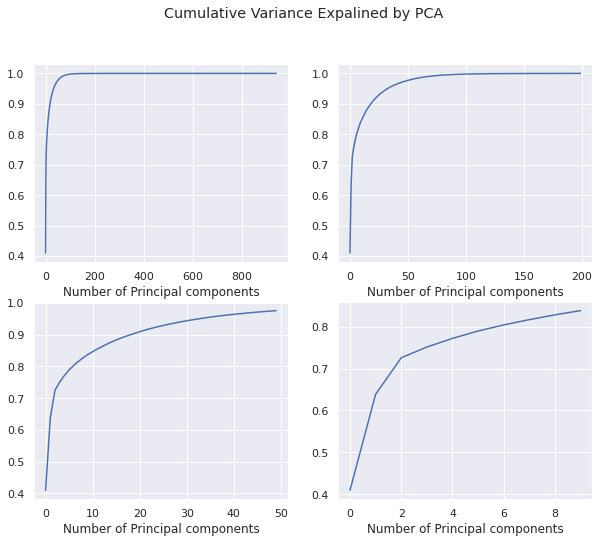

In [32]:
# Choosing the number of components
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
pca = PCA().fit(normalised_data)

axes[0,0].plot(np.cumsum(pca.explained_variance_ratio_))
axes[0,1].plot(np.cumsum(pca.explained_variance_ratio_)[:200])
axes[1,0].plot(np.cumsum(pca.explained_variance_ratio_)[:50])
axes[1,1].plot(np.cumsum(pca.explained_variance_ratio_)[:10])

for _,ax in np.ndenumerate(axes):
    ax.set_xlabel('Number of Principal components')
plt.suptitle('Cumulative Variance Expalined by PCA')
plt.show()

### Some conclusions

- This curve quantifies how much of the total, 942-dimensional variance is contained within the first N components. For example, we see that within first 10 components contain approximately 85% of the variance, while you need around 50 components to describe close to 100% of the variance.

- Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

## Future things to do

1. Dimensionality Reduction
    - Randomised PCA
    - t-SNE

2. Clustering [(Scikit-API)](https://scikit-learn.org/stable/modules/clustering.html)
    - Affinity Propagation
    - Agglomerative Clustering
    - BIRCH
    - DBSCAN
    - K-Means
    - Mini-Batch K-Means
    - Mean Shift
    - OPTICS
    - Spectral Clustering
    - Mixture of Gaussians

